C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Pridiction price is: [[652507.06214689]]


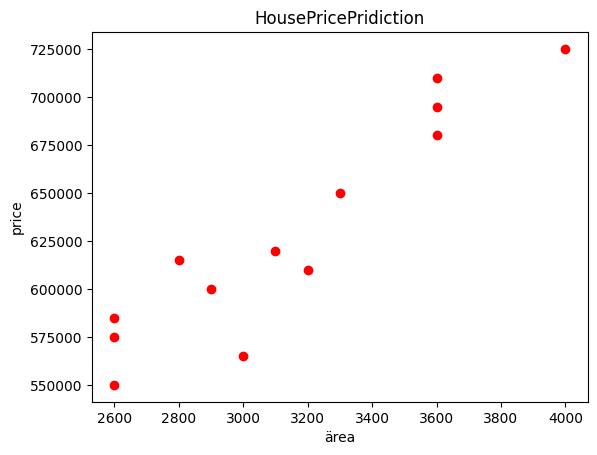

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
df=pd.read_csv("C:\\Users\\Waris Hayyat\\Desktop\\Pandas-Numpy Work\\homeprices.csv")
df.isnull().sum()
df.town.value_counts()
#town have nominal categorial value convert it into the OneHotEncoder 
ohe=OneHotEncoder(drop="first",sparse_output=False)
df_dummy=ohe.fit_transform(df[["town"]])
df.town.value_counts()
df[["west windsor_Ohe","robinsville_Ohe"]]=df_dummy
#Now we convert the value of town in to the label hot encoder now we delet the town columns from the main df file
df.drop(columns=["town"],inplace=True)
#Now train the Data that we make clean yet.
#now seprate the dependent and independent columns
x=df[["west windsor_Ohe","robinsville_Ohe","area"]]
y=df[["price"]]
plt.scatter(df["area"],y,color="r")
plt.xlabel("ärea")
plt.ylabel("price")
plt.title("HousePricePridiction")
#Now Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
Model=LinearRegression() #Set the model
Model.fit(x_train,y_train) #Fit the data into the model
result=Model.score(x_test,y_test)*100    #to check the efficency of model
#Now make pridiction with the model
#city and area 
prediction_result=Model.predict([[0,1,3200]])
print("Pridiction price is:",prediction_result)